### LDA Implementation

1. Loading data
2. Data cleaning
3. Exploratory analysis
4. Preparing data for LDA analysis
5. Model Evaluation and parameter tuning

In [ ]:
# DOWNLOAD LEMMATISER DATA
# `nltk.download('punkt')` and `nltk.download('wordnet')` are used to download the necessary resources for tokenization and lemmatization.
# 1. `nltk.download('punkt')`: This downloads the Punkt tokenizer. This is a pre-trained unsupervised machine learning model for tokenizing text. It's used by `nltk.word_tokenize()` to split the input text into words and punctuation.
# 2. `nltk.download('wordnet')`: This downloads WordNet, a large lexical database of English. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each expressing a distinct concept. The WordNetLemmatizer uses WordNet to look up lemmas, or root forms of words.
from google.colab import drive
import nltk

# Mount Google Drive
drive.mount('/content/drive/')

# Set NLTK data path to Google Drive
nltk.data.path.append("/content/drive/My Drive/SMU TMLP/nltk_data")

# Download NLTK data to Google Drive
nltk.download('punkt', download_dir="/content/drive/My Drive/SMU TMLP/nltk_data")
nltk.download('wordnet', download_dir="/content/drive/My Drive/SMU TMLP/nltk_data")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


[nltk_data] Downloading package punkt to /content/drive/My Drive/SMU
[nltk_data]     TMLP/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /content/drive/My Drive/SMU
[nltk_data]     TMLP/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# check if Google Drive successfully mounted

from google.colab import drive
import os
drive.mount('/content/drive/')

os.listdir('/content/drive/My Drive') # # list the contents of the directory

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


['SMT203', '.ipynb_checkpoints', 'Colab Notebooks', 'SMU TMLP']

# Feature Correlation and Selection


In [ ]:
# import pandas
import pandas as pd

# Specify file path
file_path = "/content/drive/MyDrive/SMU TMLP/enron_clean_reduced_temp_KHCWSMerge.csv"

# Read CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
df

,Year,Month,Day,Hour,Day_of_week,sentiment_score_compound,sentiment_score_positive,sentiment_score_neutral,sentiment_score_negative,Sender-Type,Unique-Mails-From-Sender,Contains-Reply-Forwards,Subject_lemma,Body_lemma,Subject_num_words,Subject_num_sentences,Subject_median_chars_per_word,Subject_median_words_per_sentence,Subject_uppercase_ratio,Subject_punctuation_ratio,Subject_typo_ratio,Subject_special_chars_ratio,Body_num_words,Body_num_sentences,Body_median_chars_per_word,Body_median_words_per_sentence,Body_uppercase_ratio,Body_punctuation_ratio,Body_typo_ratio,Body_special_chars_ratio,Bcc_count,Label,From,X-Origin,Body,Bcc,Body_pos_frequency,Body_lexical_complexity,Body_word2vec_features
0,2000,11,16,17,3,0.9616,0.226,0.708,0.066,0,0.003281,0,status,status john : I be not really sure what happen...,0.020408,0.0,0.063158,0.027027,0.166667,0.000000,0.000000,0.000000,0.018390,0.017204,0.052632,0.012067,0.028716,0.055743,0.036036,0.055743,0.000000,0,msagel@home.com,Arnold-J,Status John: I'm not really sure what happened...,,"{'NNP': 9, ':': 1, 'PRP': 10, 'VBP': 8, 'RB': ...",0.923077,[ 0.71445566 -2.3261511 1.2993109 1.448487...
1,2000,12,8,13,4,0.5940,0.074,0.926,0.000,0,0.000729,0,re : summer inverse,re : summer inverse I suck - hope you ve make ...,0.040816,0.0,0.089474,0.054054,0.000000,0.055556,0.000000,0.055556,0.009650,0.004301,0.052632,0.018996,0.000000,0.030508,0.140351,0.030508,0.000000,0,slafontaine@globalp.com,Arnold-J,re:summer inverses i suck-hope youve made more...,,"{'NN': 15, ':': 1, 'NNS': 3, 'VBP': 5, 'VBD': ...",0.947368,[ 0.95756644 -2.114178 0.8945547 1.367256...
2,2001,5,15,16,1,-0.3923,0.036,0.918,0.045,0,0.000547,0,the wti bullet swap contract,"the wti bullet swap contract hi , follow the e...",0.102041,0.0,0.042105,0.135135,0.172414,0.000000,0.200000,0.000000,0.031500,0.004301,0.052632,0.062007,0.074792,0.042475,0.088889,0.042475,0.000000,0,iceoperations@intcx.com,Arnold-J,"The WTI Bullet swap contracts Hi, Following th...",,"{'DT': 9, 'NNP': 43, 'NN': 26, 'NNS': 10, ',':...",0.775862,[ 0.4515546 -1.7378796 0.4099782 1.249512...
3,2000,12,12,7,1,-0.4767,0.000,0.829,0.171,0,0.001641,1,fwd : nytimes.com article : suspend rabbi quit...,fwd : nytimes.com article : suspend rabbi quit...,0.163265,0.0,0.084211,0.216216,0.149254,0.044776,0.111111,0.044776,0.002913,0.006452,0.111842,0.004301,0.076923,0.117949,0.310345,0.117949,0.000000,0,klarnold@flash.net,Arnold-J,Fwd: NYTimes.com Article: Suspended Rabbi Quit...,,"{'NN': 10, ':': 6, 'JJ': 2, 'VBN': 1, 'NNP': 1...",0.617647,[-1.03076708e+00 -1.98776089e-02 8.55472207e-...
4,2001,5,15,6,1,-0.0772,0.058,0.893,0.050,0,0.064163,0,daily chart and matrix as hot link 5/15,daily chart and matrix as hot link 5/15 the in...,0.163265,0.0,0.047368,0.216216,0.000000,0.023256,0.000000,0.023256,0.034596,0.017204,0.052632,0.022700,0.052726,0.035746,0.010101,0.035746,0.000000,0,soblander@carrfut.com,Arnold-J,daily charts and matrices as hot links 5/15 Th...,,"{'JJ': 14, 'NNS': 17, 'CC': 11, 'IN': 23, 'CD'...",0.877143,[ 0.4489542 -2.57727 1.3087538 1.816294...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433069,2001,9,21,18,4,0.0000,0.000,1.000,0.000,1,0.001276,0,review board book w / rebecca \n c./billb / d...,review board book w / rebecca c./billb / daveg...,0.102041,0.0,0.063158,0.135135,0.229885,0.114943,0.571429,0.114943,0.003642,0.002151,0.078947,0.010753,0.201058,0.126984,0.264706,0.126984,0.000000,0,bobbie.campbell@enron.com,Buy-R,Review Board Books w/Rebecca C./BillB/DaveG/Mi...,,"{'NNP': 12, 'VBD': 1, 'WRB': 2, ':': 2, ',': 2...",0.942308,[ 0.29830086 -0.19684805 0.08153074 -0.267179...
433070,2001,9,4,15,1,0.0000,0.000,1.000,0.000,1,0.008385,0,audit committee material meeting,audit committee material meet two meeting have...,0.081633,0.0,0.084211,0.108108,0.090909,0.000000,0.000000,0.000000,0.008376,0.002151,0.078947,0.024731,0.089744,0.028846,0.060000

In [ ]:
# Set the maximum number of column to display
pd.set_option('display.max_columns', None)

# Display DataFrame
df

,Year,Month,Day,Hour,Day_of_week,sentiment_score_compound,sentiment_score_positive,sentiment_score_neutral,sentiment_score_negative,Sender-Type,Unique-Mails-From-Sender,Contains-Reply-Forwards,Subject_lemma,Body_lemma,Subject_num_words,Subject_num_sentences,Subject_median_chars_per_word,Subject_median_words_per_sentence,Subject_uppercase_ratio,Subject_punctuation_ratio,Subject_typo_ratio,Subject_special_chars_ratio,Body_num_words,Body_num_sentences,Body_median_chars_per_word,Body_median_words_per_sentence,Body_uppercase_ratio,Body_punctuation_ratio,Body_typo_ratio,Body_special_chars_ratio,Bcc_count,Label,From,X-Origin,Body,Bcc,Body_pos_frequency,Body_lexical_complexity,Body_word2vec_features
0,2000,11,16,17,3,0.9616,0.226,0.708,0.066,0,0.003281,0,status,status john : I be not really sure what happen...,0.020408,0.0,0.063158,0.027027,0.166667,0.000000,0.000000,0.000000,0.018390,0.017204,0.052632,0.012067,0.028716,0.055743,0.036036,0.055743,0.000000,0,msagel@home.com,Arnold-J,Status John: I'm not really sure what happened...,,"{'NNP': 9, ':': 1, 'PRP': 10, 'VBP': 8, 'RB': ...",0.923077,[ 0.71445566 -2.3261511 1.2993109 1.448487...
1,2000,12,8,13,4,0.5940,0.074,0.926,0.000,0,0.000729,0,re : summer inverse,re : summer inverse I suck - hope you ve make ...,0.040816,0.0,0.089474,0.054054,0.000000,0.055556,0.000000,0.055556,0.009650,0.004301,0.052632,0.018996,0.000000,0.030508,0.140351,0.030508,0.000000,0,slafontaine@globalp.com,Arnold-J,re:summer inverses i suck-hope youve made more...,,"{'NN': 15, ':': 1, 'NNS': 3, 'VBP': 5, 'VBD': ...",0.947368,[ 0.95756644 -2.114178 0.8945547 1.367256...
2,2001,5,15,16,1,-0.3923,0.036,0.918,0.045,0,0.000547,0,the wti bullet swap contract,"the wti bullet swap contract hi , follow the e...",0.102041,0.0,0.042105,0.135135,0.172414,0.000000,0.200000,0.000000,0.031500,0.004301,0.052632,0.062007,0.074792,0.042475,0.088889,0.042475,0.000000,0,iceoperations@intcx.com,Arnold-J,"The WTI Bullet swap contracts Hi, Following th...",,"{'DT': 9, 'NNP': 43, 'NN': 26, 'NNS': 10, ',':...",0.775862,[ 0.4515546 -1.7378796 0.4099782 1.249512...
3,2000,12,12,7,1,-0.4767,0.000,0.829,0.171,0,0.001641,1,fwd : nytimes.com article : suspend rabbi quit...,fwd : nytimes.com article : suspend rabbi quit...,0.163265,0.0,0.084211,0.216216,0.149254,0.044776,0.111111,0.044776,0.002913,0.006452,0.111842,0.004301,0.076923,0.117949,0.310345,0.117949,0.000000,0,klarnold@flash.net,Arnold-J,Fwd: NYTimes.com Article: Suspended Rabbi Quit...,,"{'NN': 10, ':': 6, 'JJ': 2, 'VBN': 1, 'NNP': 1...",0.617647,[-1.03076708e+00 -1.98776089e-02 8.55472207e-...
4,2001,5,15,6,1,-0.0772,0.058,0.893,0.050,0,0.064163,0,daily chart and matrix as hot link 5/15,daily chart and matrix as hot link 5/15 the in...,0.163265,0.0,0.047368,0.216216,0.000000,0.023256,0.000000,0.023256,0.034596,0.017204,0.052632,0.022700,0.052726,0.035746,0.010101,0.035746,0.000000,0,soblander@carrfut.com,Arnold-J,daily charts and matrices as hot links 5/15 Th...,,"{'JJ': 14, 'NNS': 17, 'CC': 11, 'IN': 23, 'CD'...",0.877143,[ 0.4489542 -2.57727 1.3087538 1.816294...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433069,2001,9,21,18,4,0.0000,0.000,1.000,0.000,1,0.001276,0,review board book w / rebecca \n c./billb / d...,review board book w / rebecca c./billb / daveg...,0.102041,0.0,0.063158,0.135135,0.229885,0.114943,0.571429,0.114943,0.003642,0.002151,0.078947,0.010753,0.201058,0.126984,0.264706,0.126984,0.000000,0,bobbie.campbell@enron.com,Buy-R,Review Board Books w/Rebecca C./BillB/DaveG/Mi...,,"{'NNP': 12, 'VBD': 1, 'WRB': 2, ':': 2, ',': 2...",0.942308,[ 0.29830086 -0.19684805 0.08153074 -0.267179...
433070,2001,9,4,15,1,0.0000,0.000,1.000,0.000,1,0.008385,0,audit committee material meeting,audit committee material meet two meeting have...,0.081633,0.0,0.084211,0.108108,0.090909,0.000000,0.000000,0.000000,0.008376,0.002151,0.078947,0.024731,0.089744,0.028846,0.060000

In [ ]:
# List all columns in DataFrame
print(df.columns)

Index(['Year', 'Month', 'Day', 'Hour', 'Day_of_week',
       'sentiment_score_compound', 'sentiment_score_positive',
       'sentiment_score_neutral', 'sentiment_score_negative', 'Sender-Type',
       'Unique-Mails-From-Sender', 'Contains-Reply-Forwards', 'Subject_lemma',
       'Body_lemma', 'Subject_num_words', 'Subject_num_sentences',
       'Subject_median_chars_per_word', 'Subject_median_words_per_sentence',
       'Subject_uppercase_ratio', 'Subject_punctuation_ratio',
       'Subject_typo_ratio', 'Subject_special_chars_ratio', 'Body_num_words',
       'Body_num_sentences', 'Body_median_chars_per_word',
       'Body_median_words_per_sentence', 'Body_uppercase_ratio',
       'Body_punctuation_ratio', 'Body_typo_ratio', 'Body_special_chars_ratio',
       'Bcc_count', 'Label', 'From', 'X-Origin', 'Body', 'Bcc',
       'Body_pos_frequency', 'Body_lexical_complexity',
       'Body_word2vec_features'],
      dtype='object')


In [ ]:
# Drop columns and store df for remaining columns
df = df.drop(['sentiment_score_positive', 'sentiment_score_negative', 'sentiment_score_neutral', 'Subject_punctuation_ratio', 'Body_punctuation_ratio'], axis=1)

# Display DataFrame
df

,Year,Month,Day,Hour,Day_of_week,sentiment_score_compound,Sender-Type,Unique-Mails-From-Sender,Contains-Reply-Forwards,Subject_lemma,Body_lemma,Subject_num_words,Subject_num_sentences,Subject_median_chars_per_word,Subject_median_words_per_sentence,Subject_uppercase_ratio,Subject_typo_ratio,Subject_special_chars_ratio,Body_num_words,Body_num_sentences,Body_median_chars_per_word,Body_median_words_per_sentence,Body_uppercase_ratio,Body_typo_ratio,Body_special_chars_ratio,Bcc_count,Label,From,X-Origin,Body,Bcc,Body_pos_frequency,Body_lexical_complexity,Body_word2vec_features
0,2000,11,16,17,3,0.9616,0,0.003281,0,status,status john : I be not really sure what happen...,0.020408,0.0,0.063158,0.027027,0.166667,0.000000,0.000000,0.018390,0.017204,0.052632,0.012067,0.028716,0.036036,0.055743,0.000000,0,msagel@home.com,Arnold-J,Status John: I'm not really sure what happened...,,"{'NNP': 9, ':': 1, 'PRP': 10, 'VBP': 8, 'RB': ...",0.923077,[ 0.71445566 -2.3261511 1.2993109 1.448487...
1,2000,12,8,13,4,0.5940,0,0.000729,0,re : summer inverse,re : summer inverse I suck - hope you ve make ...,0.040816,0.0,0.089474,0.054054,0.000000,0.000000,0.055556,0.009650,0.004301,0.052632,0.018996,0.000000,0.140351,0.030508,0.000000,0,slafontaine@globalp.com,Arnold-J,re:summer inverses i suck-hope youve made more...,,"{'NN': 15, ':': 1, 'NNS': 3, 'VBP': 5, 'VBD': ...",0.947368,[ 0.95756644 -2.114178 0.8945547 1.367256...
2,2001,5,15,16,1,-0.3923,0,0.000547,0,the wti bullet swap contract,"the wti bullet swap contract hi , follow the e...",0.102041,0.0,0.042105,0.135135,0.172414,0.200000,0.000000,0.031500,0.004301,0.052632,0.062007,0.074792,0.088889,0.042475,0.000000,0,iceoperations@intcx.com,Arnold-J,"The WTI Bullet swap contracts Hi, Following th...",,"{'DT': 9, 'NNP': 43, 'NN': 26, 'NNS': 10, ',':...",0.775862,[ 0.4515546 -1.7378796 0.4099782 1.249512...
3,2000,12,12,7,1,-0.4767,0,0.001641,1,fwd : nytimes.com article : suspend rabbi quit...,fwd : nytimes.com article : suspend rabbi quit...,0.163265,0.0,0.084211,0.216216,0.149254,0.111111,0.044776,0.002913,0.006452,0.111842,0.004301,0.076923,0.310345,0.117949,0.000000,0,klarnold@flash.net,Arnold-J,Fwd: NYTimes.com Article: Suspended Rabbi Quit...,,"{'NN': 10, ':': 6, 'JJ': 2, 'VBN': 1, 'NNP': 1...",0.617647,[-1.03076708e+00 -1.98776089e-02 8.55472207e-...
4,2001,5,15,6,1,-0.0772,0,0.064163,0,daily chart and matrix as hot link 5/15,daily chart and matrix as hot link 5/15 the in...,0.163265,0.0,0.047368,0.216216,0.000000,0.000000,0.023256,0.034596,0.017204,0.052632,0.022700,0.052726,0.010101,0.035746,0.000000,0,soblander@carrfut.com,Arnold-J,daily charts and matrices as hot links 5/15 Th...,,"{'JJ': 14, 'NNS': 17, 'CC': 11, 'IN': 23, 'CD'...",0.877143,[ 0.4489542 -2.57727 1.3087538 1.816294...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433069,2001,9,21,18,4,0.0000,1,0.001276,0,review board book w / rebecca \n c./billb / d...,review board book w / rebecca c./billb / daveg...,0.102041,0.0,0.063158,0.135135,0.229885,0.571429,0.114943,0.003642,0.002151,0.078947,0.010753,0.201058,0.264706,0.126984,0.000000,0,bobbie.campbell@enron.com,Buy-R,Review Board Books w/Rebecca C./BillB/DaveG/Mi...,,"{'NNP': 12, 'VBD': 1, 'WRB': 2, ':': 2, ',': 2...",0.942308,[ 0.29830086 -0.19684805 0.08153074 -0.267179...
433070,2001,9,4,15,1,0.0000,1,0.008385,0,audit committee material meeting,audit committee material meet two meeting have...,0.081633,0.0,0.084211,0.108108,0.090909,0.000000,0.000000,0.008376,0.002151,0.078947,0.024731,0.089744,0.060000,0.028846,0.004386,0,sharron.westbrook@enron.com,Buy-R,Audit Committee Materials meeting Two meetings...,"dortha.gray@enron.com, k..heathman@enron.com, ...","{'NNP': 21, 'VBG': 1, 'CD': 6, 'NNS': 3, 'VBP'...",0.818116,[ 0.31306246 -1.7426066 0.68086064 0.965420...
433071,2001,11,5,9,0,0.9758,1,0.011666,0,credit story,"credit story rick / bill / david , generally ,...",0.040816,0.0,0.057895,0.

Subject_median_words_per_sentence and Subject_num_words are highly correlated.
Body_num_sentences and Body_num_words are highly correlated.


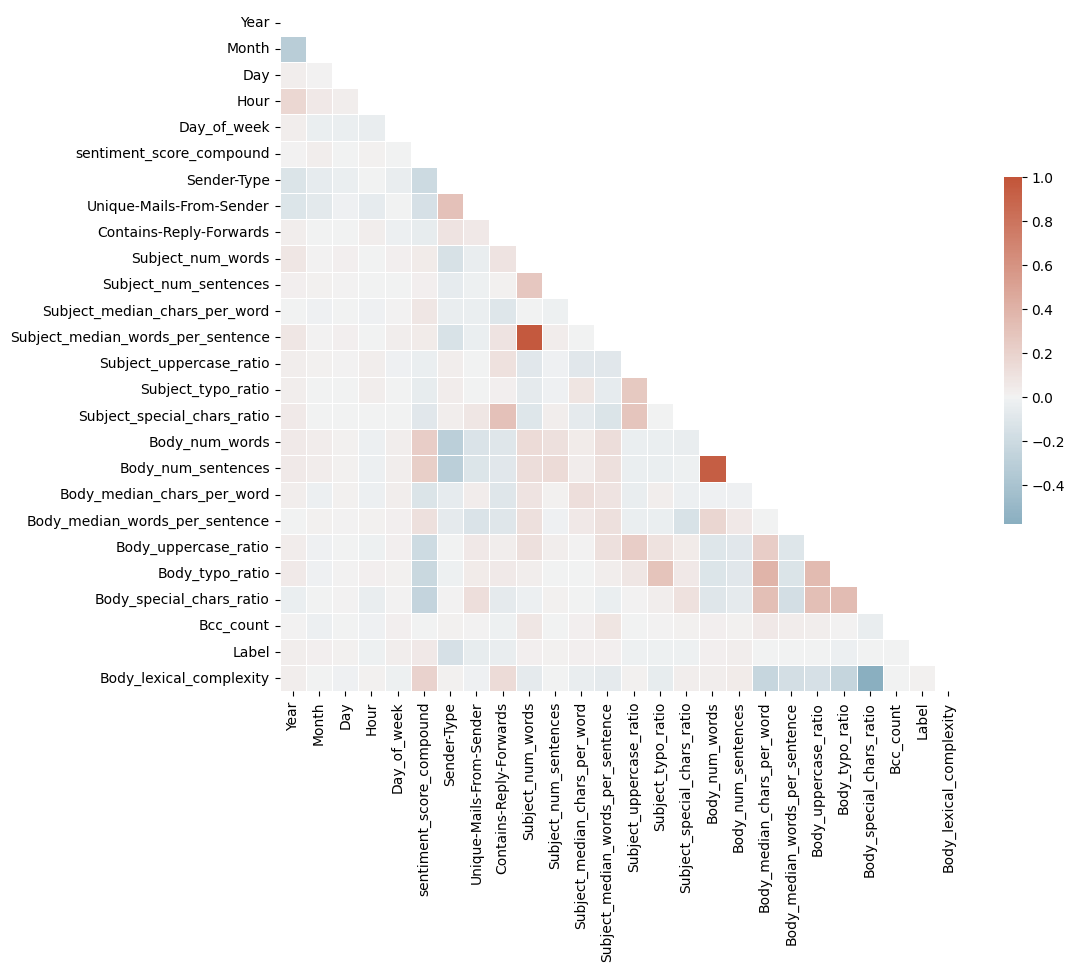

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np


# Select only the numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = df_numeric.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)

# Find and print highly correlated pairs
threshold = 0.8  # TWEAK PLSb
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            print(f"{corr.columns[i]} and {corr.columns[j]} are highly correlated.")

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# Set the print options
np.set_printoptions(suppress=True, precision=6)

# List of correlated feature pairs
correlated_pairs = [
    #("sentiment_score_neutral", "sentiment_score_positive"),
    ("Subject_median_words_per_sentence", "Subject_num_words"),
    #("Subject_special_chars_ratio", "Subject_punctuation_ratio"),
    ("Body_num_sentences", "Body_num_words"),
    #("Body_special_chars_ratio", "Body_punctuation_ratio")
]

# Define a threshold for the explained variance ratio
threshold = 0.8

for pair in correlated_pairs:
    # Select the pair of features
    X = df[list(pair)].values

    # Apply PCA
    pca = PCA(n_components=2)
    pca.fit(X)

    # Print the explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    print(f"For the pair {pair}, the explained variance ratio is {explained_variance_ratio}")

    # Check if the explained variance ratio is above the threshold
    if explained_variance_ratio[0] > threshold:
        print(f"The pair {pair} does not provide much additional information and can be reduced to one feature.")
    else:
        print(f"The pair {pair} provides additional information and should be kept.")
    print()

For the pair ('Subject_median_words_per_sentence', 'Subject_num_words'), the explained variance ratio is [0.983533 0.016467]
The pair ('Subject_median_words_per_sentence', 'Subject_num_words') does not provide much additional information and can be reduced to one feature.

For the pair ('Body_num_sentences', 'Body_num_words'), the explained variance ratio is [0.974587 0.025413]
The pair ('Body_num_sentences', 'Body_num_words') does not provide much additional information and can be reduced to one feature.

